# Student Performance Indicator

## Life cycle of Machine Learning Project


   - Understanding the Problem Statement
   - Data Collection
   - Data Checks to Perform
   - Exploratory Data Analysis
   - Data Pre-Processing
   - Model Training
   - Choose Best Model
   
   
## 1. Problem Statement
  
   - This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethinicity, Parental level of education, Lunch and Test preparation course.
   
## 2. Data Collection
 
 
   - Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
   - The data consists of 8 columns and 1000 rows.
   
### 2.1. Import Data and Required Packages
   
   
   - Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv("data/StudentsPerformance.csv")

#### Show Top 5 Records

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the Data

In [5]:
df.shape

(1000, 8)

### 2.2. Dataset Information

  - gender: sex of students -> (Male/Female)
  - race/ethnicity: ethnicity of students -> (Group A,B,C,D,E)
  - parental level of education: parent's final education -> (bachelor's degree, some college, master's degree, associate's degree, high school)
  - lunch: having lunch before test (standard or free/reduced)
  - test preparation course: complete or not complete before test
  - math score
  - reading score
  - writing score

## 3. Data Checks to Perform

  - Check Missing Values
  - Check Duplicates
  - Check Data Type
  - Check the Number of Unique Values of Each Column
  - Check Statistics Dataset
  - Check Various Categories Present in the Different Categorical Column

### 3.1. Check Missing Values

In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

##### There are no missing values in the data set

### 3.2. Check Duplicates

In [7]:
df.duplicated().sum()

0

##### There are no duplicate values in the data set

### 3.3. Check Data Types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4. Checking the Number of Unique Values of Each Column

In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 3.5. Check Statistics of Data Set

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insights

  - From above description of numerical data, all means are very close to each other - between 66 and 68.05.
  - All standard deviations are also close - between 14.6 and 15.19.
  - While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17.

### 3.7. Exploring Data

In [11]:
print("Categories in 'gender' variable: ", end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable: ", end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable: ", end=" ")
print(df['parental level of education'].unique())

print("Categories in 'gender' variable: ", end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable: ", end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'gender' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [13]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features: {}'.format(len(numeric_features),numeric_features))
print('We have {} categorical features: {}'.format(len(categorical_features),categorical_features))

We have 3 numerical features: ['math score', 'reading score', 'writing score']
We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### 3.8. Adding Columns for "Total Score" and "Average"

In [14]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Math: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Math: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [17]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Math: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Math: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#### Insights

  - From above values we get students have performed the worst in maths
  - Best performance in in reading section

## 4. Exploring Data (Visualization)

### 4.1. Visualize average score distribution to make some conclusion.

  - Histogram
  - Kernel Distribution Function (KDE)
  
  
  
#### 4.1.1. Histogram & KDE

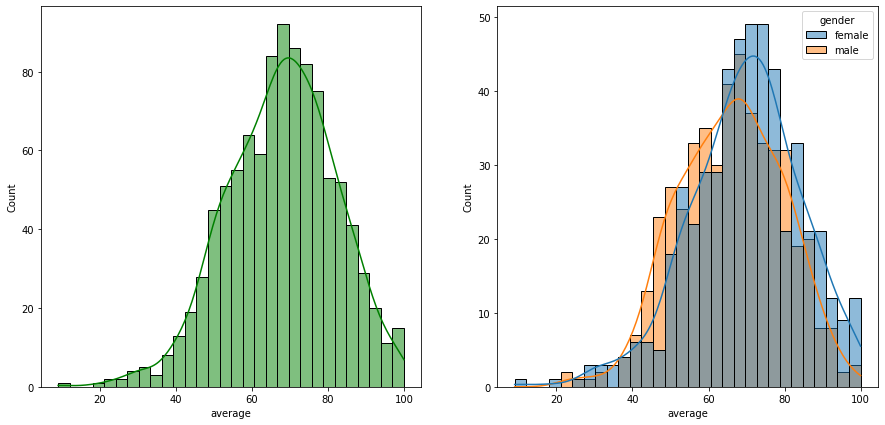

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data = df, x = 'average', bins = 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data = df, x = 'average', bins = 30, kde = True, hue = 'gender')
plt.show()

#### Insights

  - Female students tend to perform well than male students.

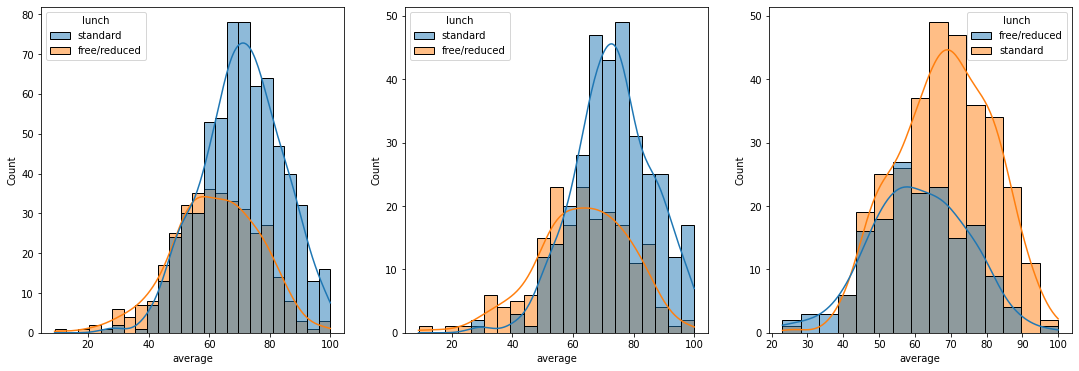

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data = df, x = 'average', kde = True, hue = 'lunch')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'female'], x = 'average', kde = True, hue = 'lunch')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'], x = 'average', kde = True, hue = 'lunch')
plt.show()

#### Insights

  - Standard lunch helps perform well in exams.
  - Standard lunch helps perform well in exams be it a male or a female.

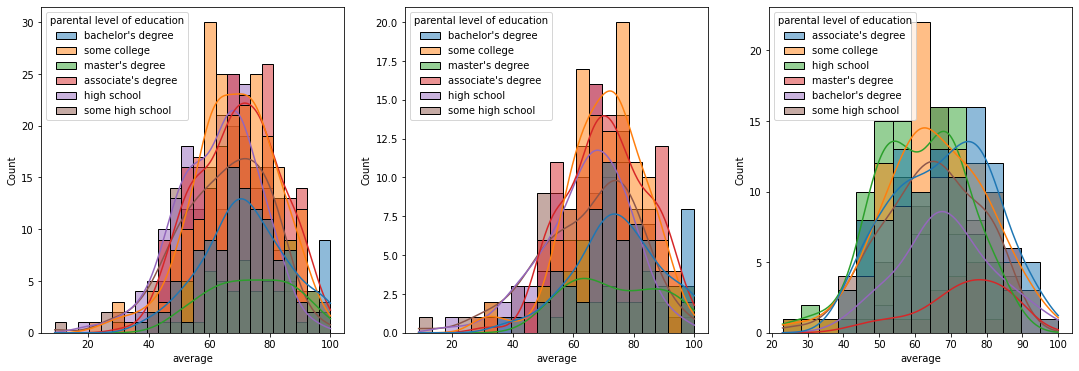

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data = df, x = 'average', kde = True, hue = 'parental level of education')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'female'], x = 'average', kde = True, hue = 'parental level of education')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'], x = 'average', kde = True, hue = 'parental level of education')
plt.show()

#### Insights

  - In general parent's education don't help student perform well in exam.
  - 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam.
  - 3rd plot we can see there is no effect of parent's education on female students.

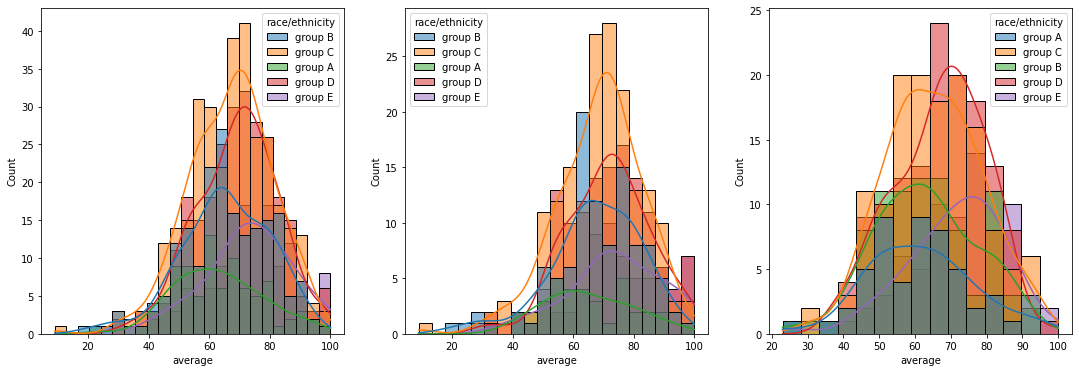

In [22]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data = df, x = 'average', kde = True, hue = 'race/ethnicity')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'female'], x = 'average', kde = True, hue = 'race/ethnicity')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'], x = 'average', kde = True, hue = 'race/ethnicity')
plt.show()

#### Insights

  - Students who have completed the Test Preparation Course have scores higher in all three categories than those who haven't taken the course.

### 4.2. Maximum Score of Students in All Three Subjects

<AxesSubplot:title={'center':'Writing Score'}, ylabel='writing score'>

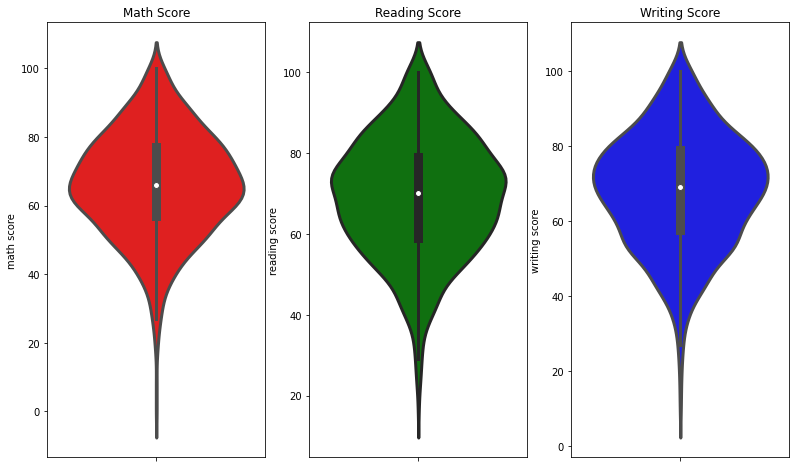

In [23]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Math Score')
sns.violinplot(y='math score', data = df, color = 'red', linewidth = 3)
plt.subplot(1,4,2)
plt.title('Reading Score')
sns.violinplot(y='reading score', data = df, color = 'green', linewidth = 3)
plt.subplot(1,4,3)
plt.title('Writing Score')
sns.violinplot(y='writing score', data = df, color = 'blue', linewidth = 3)

#### Insights

  - From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of the score from 50-80

### 4.3. Multivariate Analysis Using Pieplot

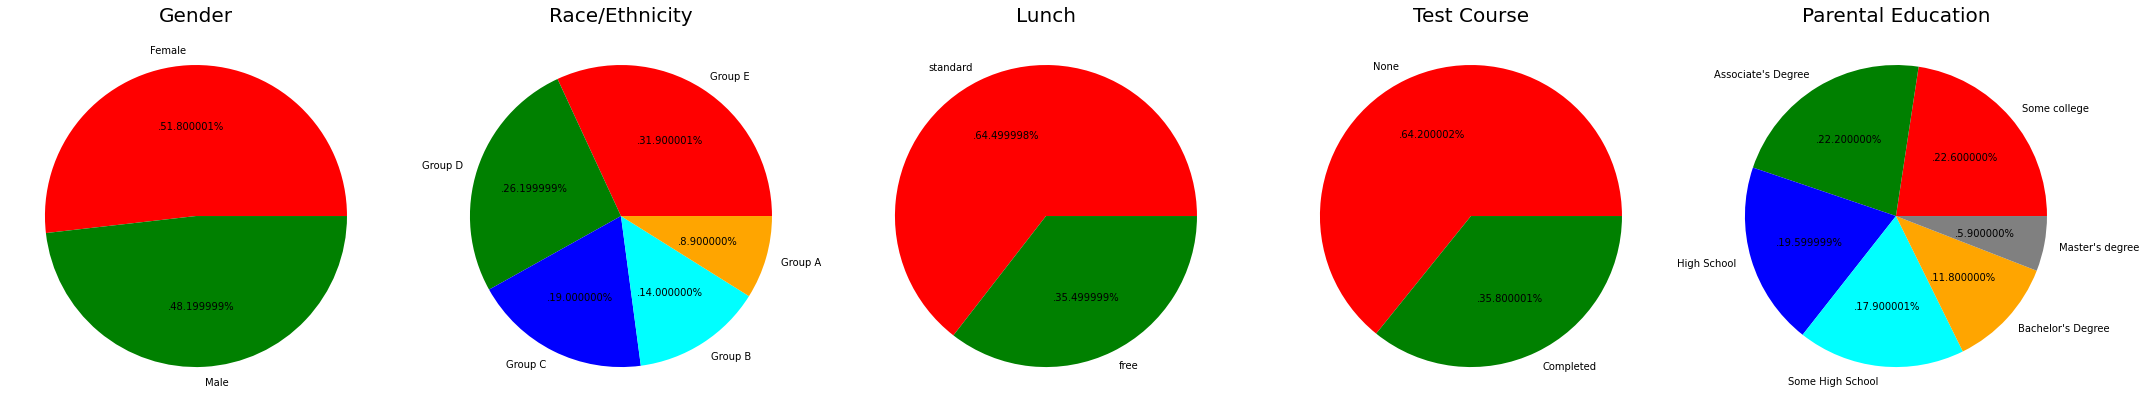

In [24]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race/ethnicity'].value_counts()
labels = 'Group E', 'Group D', 'Group C', 'Group B', 'Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = 'standard', 'free'
color = ['red','green']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,5)
size = df['parental level of education'].value_counts()
labels = 'Some college', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's degree"
color = ['red','green', 'blue', 'cyan', 'orange', 'grey']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

#### Insights

  - Number of Male and Female students is almost equal
  - Number of students are greatest in Group C
  - Number of students who have standard lunch are greatest
  - Number of students who have not enrolled in any test preparation course is greater
  - Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree".

### 4.4. Feature Wise Visualization

#### 4.4.1. Gender Column

  - How is distribution of Gender?
  - Is gender has any impact on student's performance?

#### Univariate Analysis (How is distribution of Gender?)

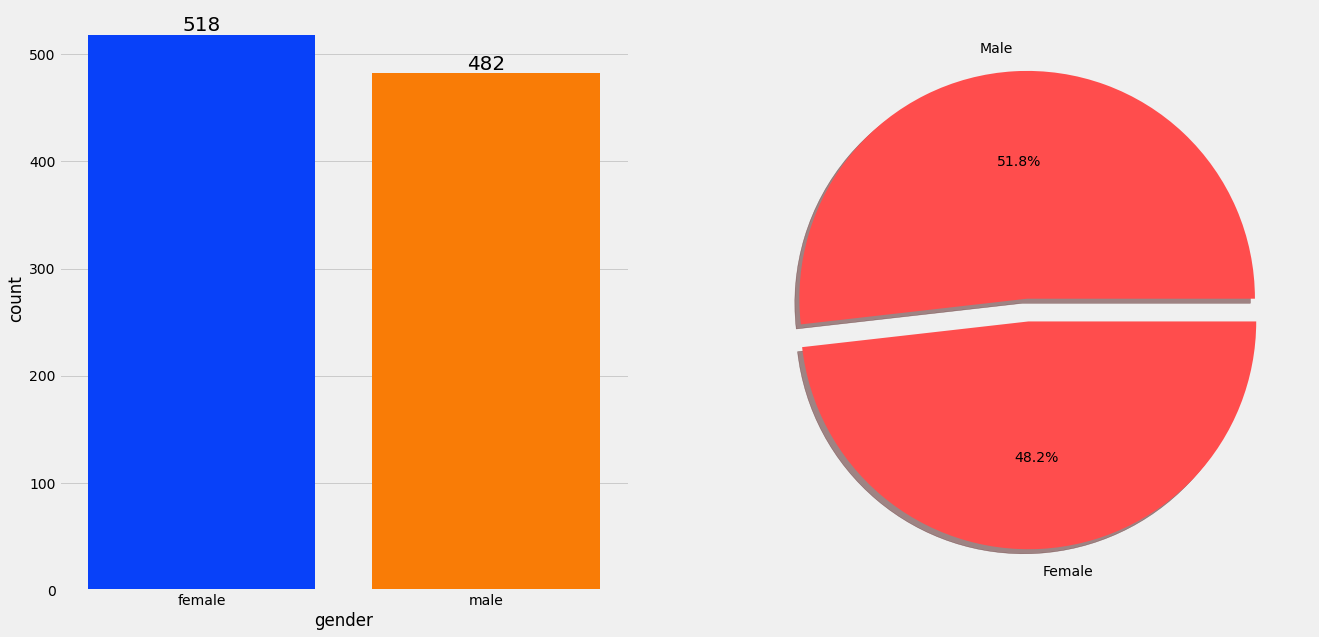

In [40]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x = df['gender'], data = df, palette = 'bright', ax = ax[0], saturation = 0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 20)
    
plt.pie(x = df['gender'].value_counts(), labels = ['Male', 'Female'], explode = [0,0.1], autopct = '%1.1f%%', shadow = True, colors=['#ff4d4d'])
plt.show()

#### Insights

  - Gender has balanced data with female students are 518(48%) and male students are 482(52%)

#### Bivariate Analysis (Is gender has any impact on student's performance?)

In [30]:
gender_group = df.groupby('gender').mean()
gender_group

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


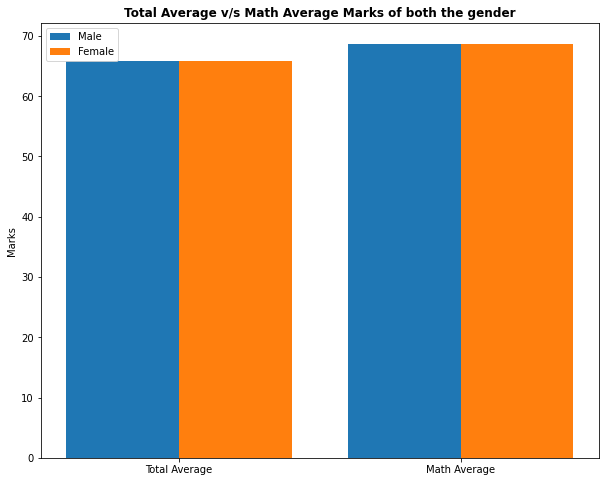

In [32]:
plt.figure(figsize = (10,8))

x = ['Total Average', 'Math Average']

female_score = [gender_group['average'][0], gender_group['math score'][0]]
male_score = [gender_group['average'][1], gender_group['math score'][1]]

x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, male_score, 0.4, label = 'Male')
plt.bar(x_axis + 0.2, male_score, 0.4, label = 'Female')

plt.xticks(x_axis, x)
plt.ylabel("Marks")
plt.title("Total Average v/s Math Average Marks of both the gender", fontweight = 'bold')
plt.legend()
plt.show()

#### Insights

  - On an average females have a better overall score than males.
  - Whereas males have scored higher in Maths.

#### 4.4.2. Race/Ethnicity Column

  - How is group wise distribution?
  - Is race/ethnicity has any impact on student's performance?

#### Univariate Analysis (How is Group Wise Distribution?)

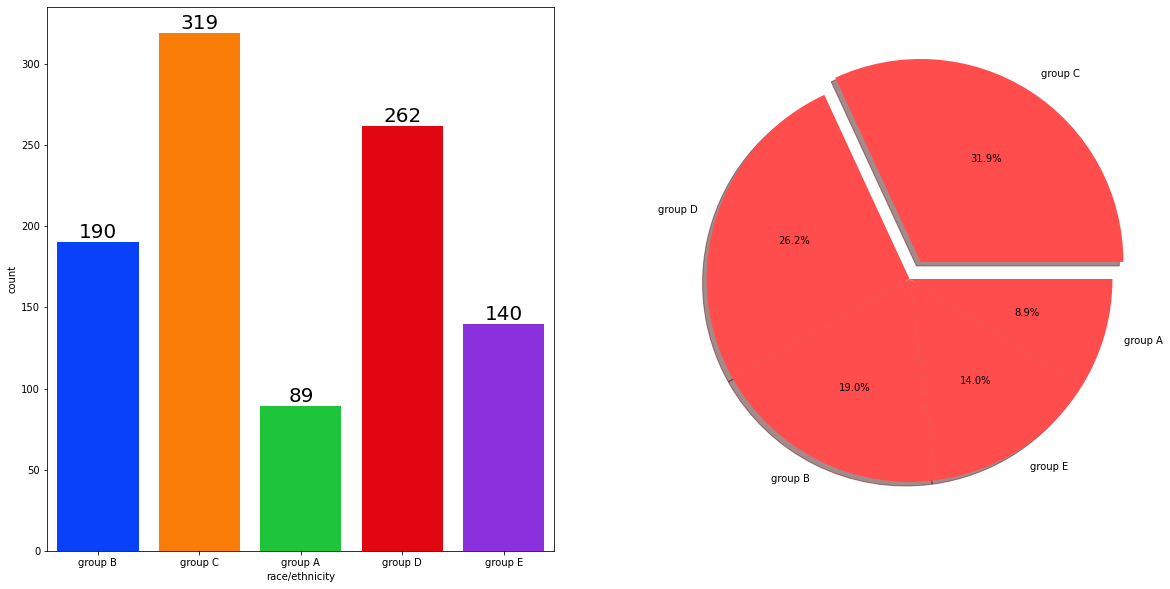

In [33]:
f,ax = plt.subplots(1,2,figsize = (20,10))
sns.countplot(x = df['race/ethnicity'], data = df, palette = 'bright', ax = ax[0], saturation = 0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 20)
    
plt.pie(x = df['race/ethnicity'].value_counts(), labels = df['race/ethnicity'].value_counts().index, explode = [0.1,0,0,0,0], autopct = '%1.1f%%', shadow = True, colors=['#ff4d4d'])
plt.show()

#### Insights

  - Most of the students belonging from group C/group D.
  - Lowest number of students belong to group A.

#### Bivariate Analysis (Is Race/Ethnicity has any Impact on Student's Performance?)

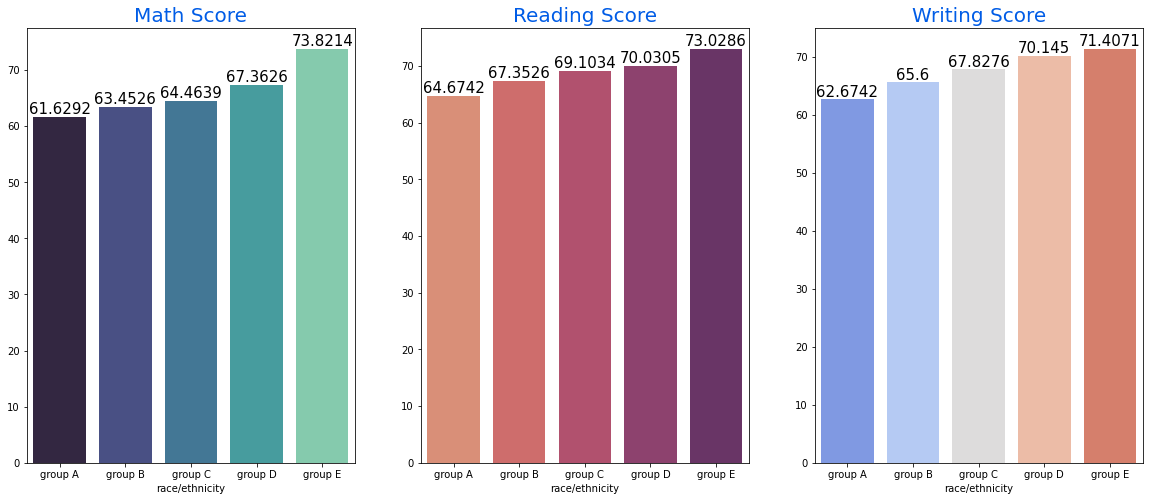

In [36]:
Group_data2 = df.groupby('race/ethnicity')
f,ax = plt.subplots(1,3,figsize = (20,8))
sns.barplot(x = Group_data2['math score'].mean().index, y = Group_data2['math score'].mean().values, palette = 'mako', ax=ax[0])
ax[0].set_title('Math Score', color = '#005ce6', size = 20)

for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 15)
    
sns.barplot(x = Group_data2['reading score'].mean().index, y = Group_data2['reading score'].mean().values, palette = 'flare', ax=ax[1])
ax[1].set_title('Reading Score', color = '#005ce6', size = 20)

for container in ax[1].containers:
    ax[1].bar_label(container, color = 'black', size = 15)
    
sns.barplot(x = Group_data2['writing score'].mean().index, y = Group_data2['writing score'].mean().values, palette = 'coolwarm', ax=ax[2])
ax[2].set_title('Writing Score', color = '#005ce6', size = 20)

for container in ax[2].containers:
    ax[2].bar_label(container, color = 'black', size = 15)

#### Insights

 - Group E students have scored the highest marks.
 - Group A students have scored the lowest marks.
 - Students from a lower Socioeconomic status have a lower avg in all course subjects.

#### 4.4.3. Parental Level of Education Column

  - What is educational background of student's parent?
  - Is parental education has any impact on student's performance?

#### Univariate Analysis (What is educational background of student's parent?)

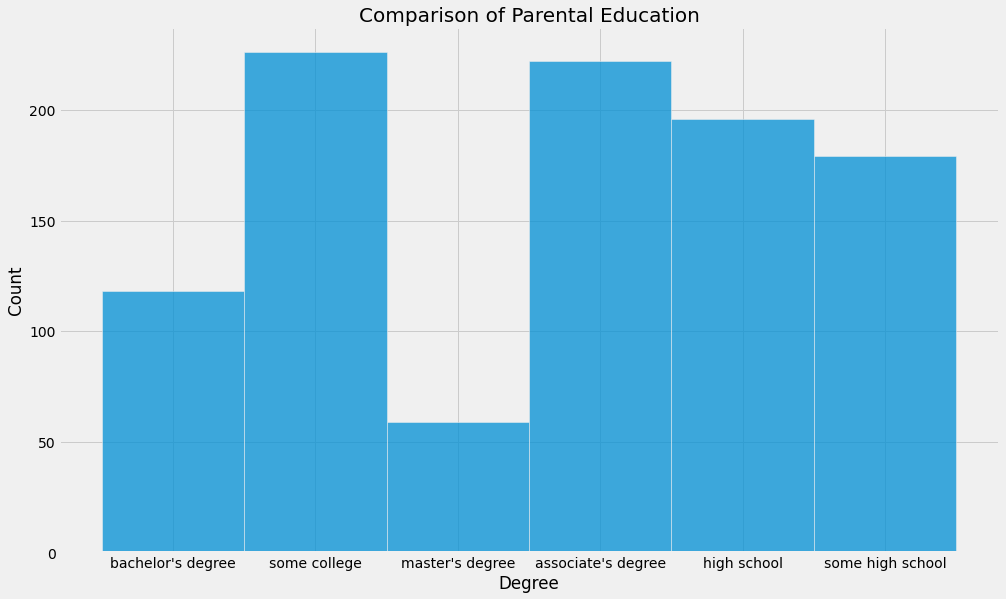

In [41]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')
sns.histplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

#### Insights

  - Largest number of parents are from some college.

#### Bivariate Analysis (Is Parental education has any Impact on Student's Performance?)

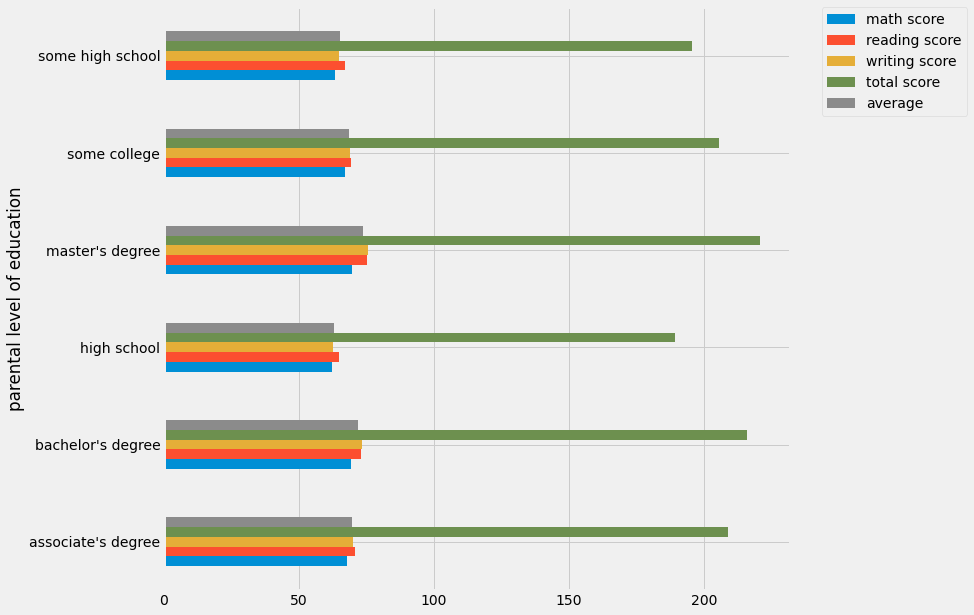

In [42]:
df.groupby('parental level of education').agg('mean').plot(kind = 'barh', figsize = (10,10))
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.show()

#### Insights

  - The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4. Lunch Column

  - Which type of lunch is most common among students?
  - What is the effect of lunch type on test results?

#### Univariate Analysis (Which type of lunch is most common among students?)

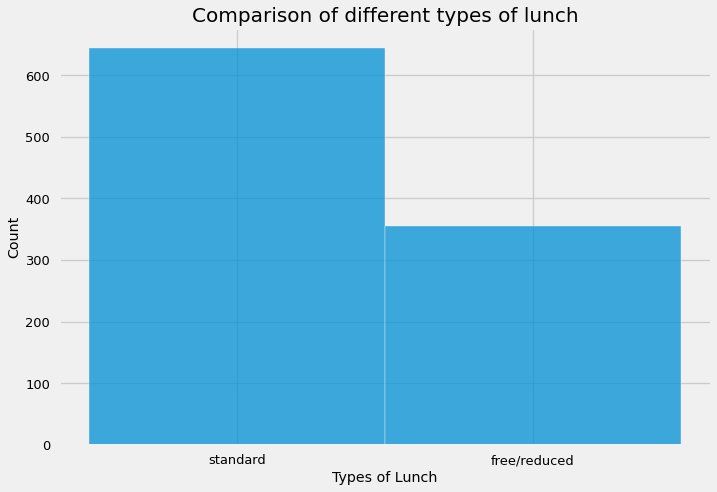

In [47]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('seaborn-talk')
sns.histplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel("Types of Lunch")
plt.ylabel('Count')
plt.show()

#### Insights

  - Students being served Standard lunch was more than free lunch

#### Bivariate Analysis (Is lunch type intake has any impact on student's performance?)

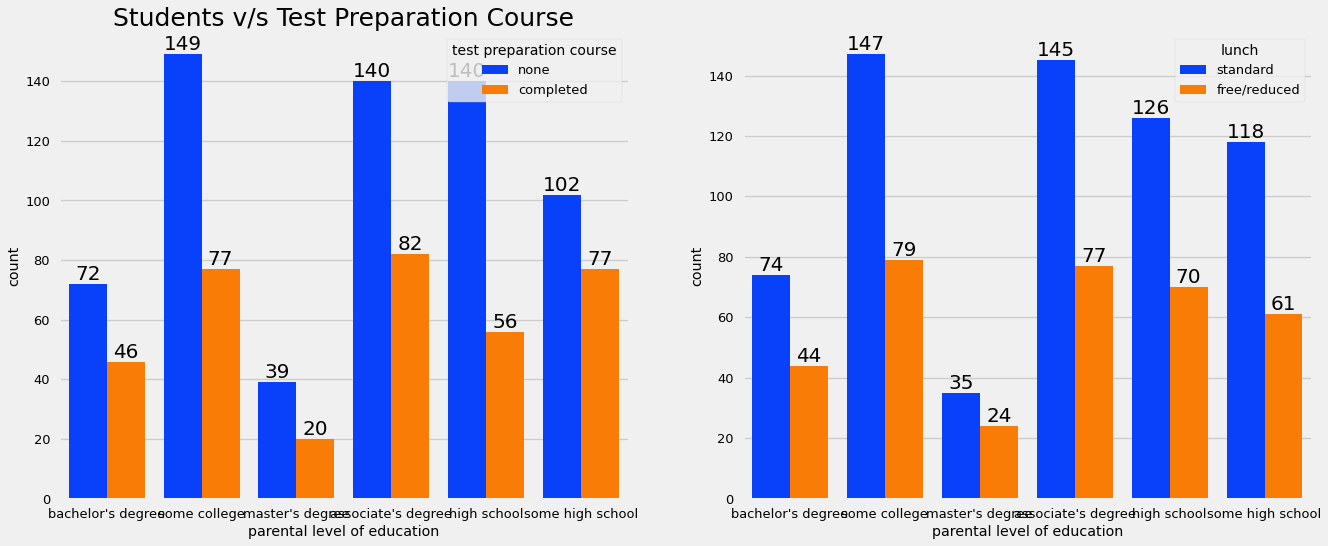

In [48]:
f,ax = plt.subplots(1,2,figsize = (20,8))
sns.countplot(x = df['parental level of education'], data = df, palette = 'bright', hue = 'test preparation course', saturation = 0.95, ax = ax[0])
ax[0].set_title('Students v/s Test Preparation Course', color = 'black', size = 25)
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 20)

sns.countplot(x = df['parental level of education'], data = df, palette = 'bright', hue = 'lunch', saturation = 0.95, ax = ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, color = 'black', size = 20)

#### Insights

  - Students who get standard lunch tend to perform better than students who got free/reduced lunch.

#### 4.4.5. Test Preparation Course Column

  - Is test preparation course has any impact on student's performance?

#### Bivariate Analysis (Is test preparation course has any impact on student's performance?)

<AxesSubplot:xlabel='lunch', ylabel='writing score'>

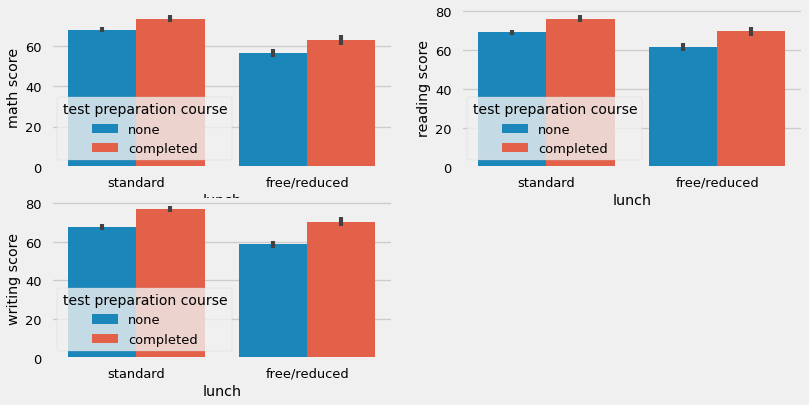

In [50]:
plt.figure(figsize = (12,6))
plt.subplot(2,2,1)
sns.barplot(x = df['lunch'], y = df['math score'], hue = df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot(x = df['lunch'], y = df['reading score'], hue = df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot(x = df['lunch'], y = df['writing score'], hue = df['test preparation course'])


#### Insights

  - Students who have completed the Test Preparation Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6. Checking Outliers

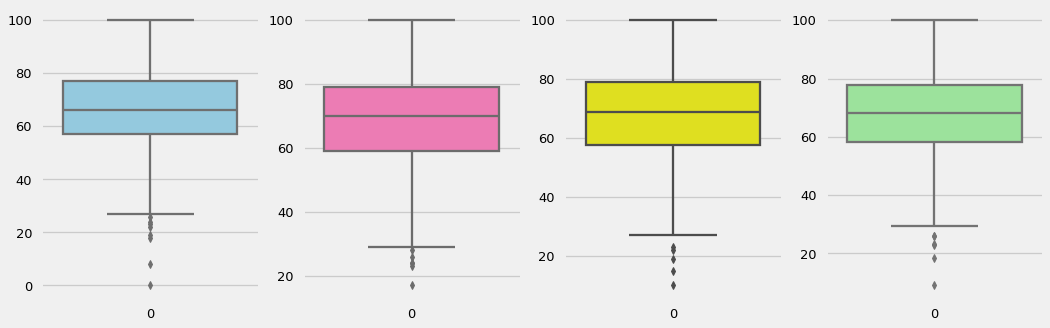

In [51]:
plt.subplots(1,4,figsize = (16,5))
plt.subplot(141)
sns.boxplot(df['math score'], color = 'skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'], color = 'hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'], color = 'yellow')
plt.subplot(144)
sns.boxplot(df['average'], color = 'lightgreen')
plt.show()

#### Multivariate Analysis using Pairplot

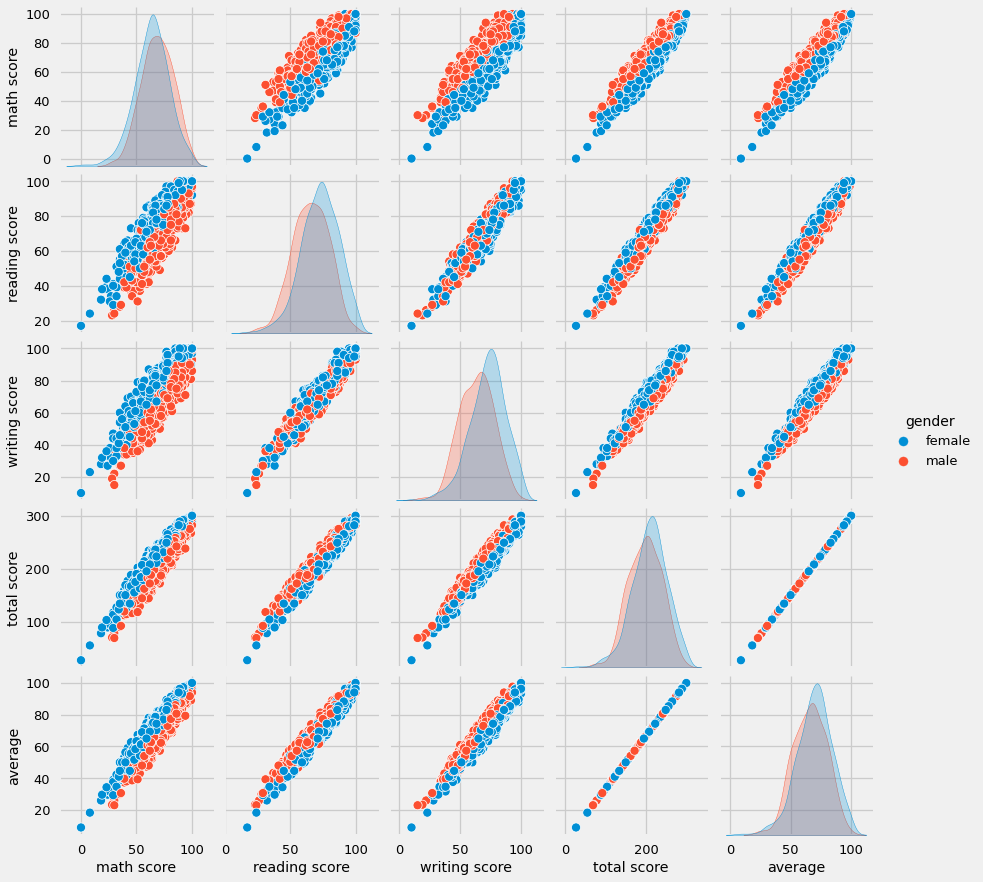

In [52]:
sns.pairplot(df, hue = 'gender')
plt.show()

#### Insights

   - From the above plot it is clear that all the scores increase linearly with each other.

## 5. Conclusions

  - Student's Performance is related with lunch, race, parental level of education.
  - Females lead in pass percentage and also are top-scorers.
  - Student's Performance is not much related with test preparation course.
  - Finishing Preparation course is benefitial.